In [12]:
# coding: utf-8
import os
import numpy as np
import sys
import pickle
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

# Dataset.pyの格納先を環境変数に追加する
sys.path.append("../src/utils")
sys.path.append("../src")
from Dataset import Dataset

# 転移学習用
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Flatten, Input, Activation
from keras.models import Model, Sequential
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint

In [98]:
# データセットを定義
dataset = Dataset()
# pickleの格納先
pickle_path = "../data/dataset.pkl"
# pickleからデータセットを読み込む
dataset.read_pickle(pickle_path)

In [99]:
# 学習データとテストデータの割合
ratio = 0.2
# 学習データとテストデータに分ける
dataset.split_data(ratio)

In [100]:
# モデルの定義
input_tensor = Input(shape=(100, 100, 3))
vgg16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

top_model = Sequential()
top_model.add(Flatten(input_shape=vgg16.output_shape[1:]))
top_model.add(Dense(128))
top_model.add(Activation('relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(128))
top_model.add(Activation('relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(128))
top_model.add(Activation('relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(2))
top_model.add(Activation('softmax'))

model = Model(inputs=vgg16.input, outputs=top_model(vgg16.output))

# 15層目までは学習を行わない
for layer in model.layers[:15]:
  layer.trainable = False

# モデルをコンパイル
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])

In [101]:
dataset.y_train = to_categorical(dataset.y_train)
dataset.y_test = to_categorical(dataset.y_test)

In [108]:
print(1 - dataset.y_test.argmax(axis=1).sum()/dataset.y_test.shape[0])
print(dataset.y_test.argmax(axis=1).sum()/dataset.y_test.shape[0])

0.7012195121951219
0.29878048780487804


In [109]:
model_path = "../models"
model_name = "VGG16_finetuning_2"

cl = CSVLogger('{}/{}.csv'.format(model_path, model_name))

cp = ModelCheckpoint('{}/{}.hdf5'.format(model_path, model_name),
                     monitor="val_acc", verbose=1,
                     save_best_only=True, save_weights_only=True)

history = model.fit(
              dataset.X_train, dataset.y_train,
              batch_size=64, epochs=20,
              validation_data=(dataset.X_test, dataset.y_test),
              callbacks=[cp, cl])

Train on 2624 samples, validate on 656 samples
Epoch 1/20
2624/2624 [==============================] - 369s 140ms/step - loss: 7.3737 - acc: 0.5400 - val_loss: 11.1918 - val_acc: 0.3018

Epoch 00001: val_acc improved from -inf to 0.30183, saving model to ../models/VGG16_finetuning_2.hdf5
Epoch 2/20
2624/2624 [==============================] - 371s 141ms/step - loss: 7.5997 - acc: 0.5259 - val_loss: 11.1918 - val_acc: 0.3018

Epoch 00002: val_acc did not improve from 0.30183
Epoch 3/20
2624/2624 [==============================] - 3378s 1s/step - loss: 7.3309 - acc: 0.5427 - val_loss: 11.1918 - val_acc: 0.3018

Epoch 00003: val_acc did not improve from 0.30183
Epoch 4/20
2624/2624 [==============================] - 367s 140ms/step - loss: 7.4531 - acc: 0.5351 - val_loss: 11.1918 - val_acc: 0.3018

Epoch 00004: val_acc did not improve from 0.30183
Epoch 5/20
1728/2624 [==================>...........] - ETA: 1:44 - loss: 7.4492 - acc: 0.5353

KeyboardInterrupt: 

In [39]:
X_pre = dataset.X_test[0]

In [72]:
dataset.X_test.shape

(656, 100, 100, 3)

In [85]:
model.predict(dataset.X_test[:5]).argmax(axis=1)

array([0, 0, 0, 0, 0])

In [86]:
predict_class = model.predict(dataset.X_test).argmax(axis=1)

In [87]:
predict_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[0.654588   0.34541205]]
正解！
正解ラベル: タイプでない


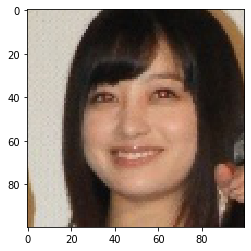

In [90]:
num = 500
for i, (X_pre, y_pre, path_pre) in enumerate(zip(dataset.X_test, dataset.y_test, dataset.path_test)):
    if i == num:
        X_pre = X_pre.reshape((1, 100, 100, 3))
        print(model.predict(X_pre))
        img = cv2.imread(".{}".format(path_pre))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        if y_pre.argmax() == model.predict(X_pre).argmax():
            print("正解！")
        else:
            print("不正解...")
        print("正解ラベル: ", end="")
        if y_pre[0]==1:
            print("タイプでない")
        elif y_pre[1]==1:
            print("タイプ!!!!")

In [67]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline